## 线性回归

In [60]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### 初始化 learning rate 和 epoch num

In [49]:
learning_rate = 0.01
epoch_num = 100

### 初始化训练样本 X，Y

In [56]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_x = train_X.shape[0]

### 初始化placeholder 和 W，b参数
+ 用 ```tf.placeholder``` 初始化占位符
+ 用 ```tf.Variable``` 初始化参数

In [57]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [58]:
W = tf.Variable(np.random.randn(), name="Weight")
b = tf.Variable(np.random.randn(), name="bias")

### 线性回归函数

+ 线性回归求解预测值，用以下的线性函数，$\widehat{Y}$表示预测值
<br\>
$$
\widehat{Y} = WX + b
$$
<br\>
+ 线性回归的损失函数， $m$代表的所有的训练样本的个数，$Y$表示训练样本的输出值
<br\>
$$
cost = \frac{\widehat{Y} - Y}{2m}
$$

In [59]:
Y_hat = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(Y_hat-Y, 2)/(2*n_x))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### 训练

epoch: 0, cost: 0.112444952
epoch: 10, cost: 0.008538131
epoch: 20, cost: 0.007800182
epoch: 30, cost: 0.007506419
epoch: 40, cost: 0.007225760
epoch: 50, cost: 0.006953808
epoch: 60, cost: 0.006690300
epoch: 70, cost: 0.006435004
epoch: 80, cost: 0.006187684
epoch: 90, cost: 0.005948136


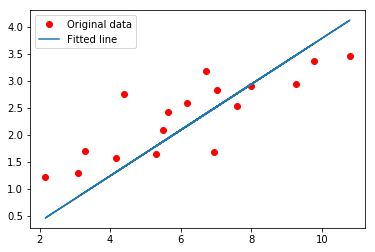

In [55]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epoch_num):
        for (x, y) in zip(train_X, train_Y):
            _, c = sess.run([optimizer, cost], feed_dict={X: x, Y: y})
            
        if epoch % 10 == 0:
            print("epoch: {}, cost: {:.9f}".format(epoch, c))
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()